## clusters 2 kmeans

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1', index_col=0)
df.head(2)

df = df[df["clusters_kmeans"] == 2]
print(df.shape[0])
df = df.drop(columns=["clusters_kmeans","clusters_agglomerative"])
df.columns

1888


Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales_respuesta'],
      dtype='object')

In [3]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2388,"1,516.28","1,750.76",Train,tree,-234.48
1363,"1,938.15","1,750.76",Train,tree,187.39
1647,"1,251.94","1,092.47",Train,tree,159.46


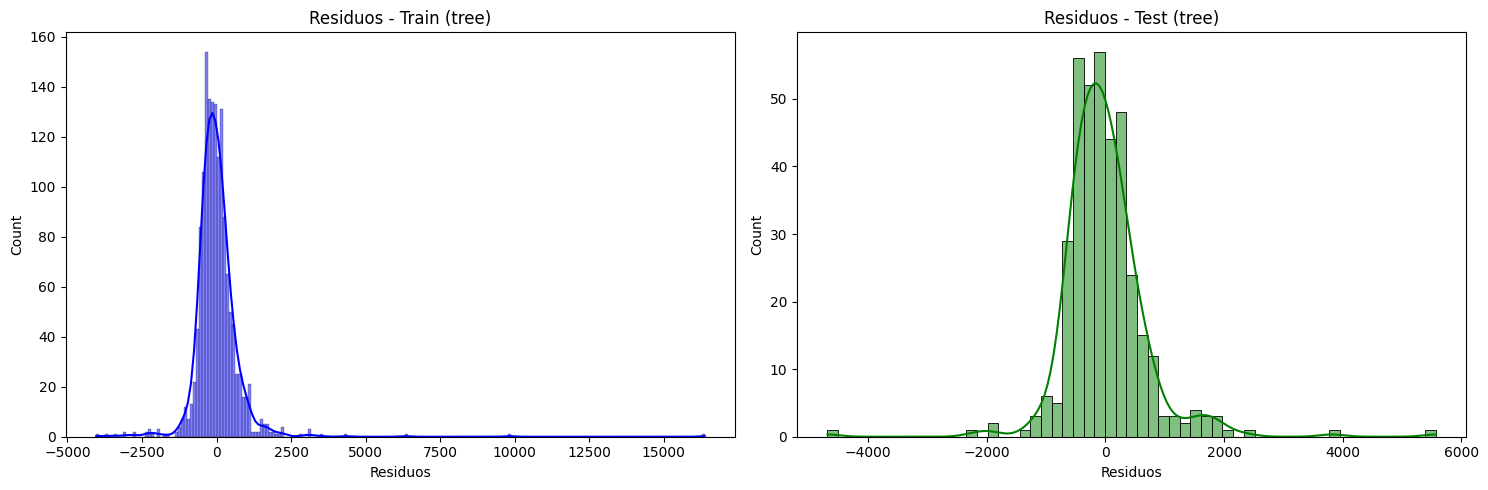

In [4]:
analisis.plot_residuos("tree")

In [5]:
analisis.calcular_metricas("tree")

,train,test
R2,0.62,0.62
MAE,434.21,458.92
MSE,"639,152.34","512,689.48"
RMSE,799.47,716.02


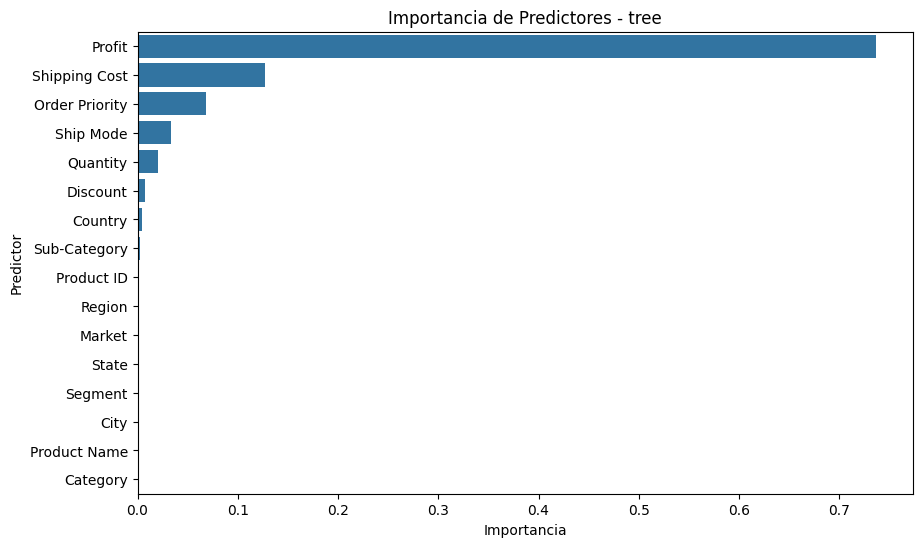

,Predictor,Importancia
13,Profit,0.74
14,Shipping Cost,0.13
15,Order Priority,0.07
0,Ship Mode,0.03
11,Quantity,0.02
12,Discount,0.01
4,Country,0.00
9,Sub-Category,0.00
7,Product ID,0.00
6,Region,0.00


In [6]:
analisis.importancia_predictores("tree")

In [7]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_rf = {
    'n_estimators': [150],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2013,"2,591.56","1,822.54",Train,random_forest,769.02
1736,"2,679.12","2,699.60",Train,random_forest,-20.48
1006,"1,838.52","1,451.27",Train,random_forest,387.25


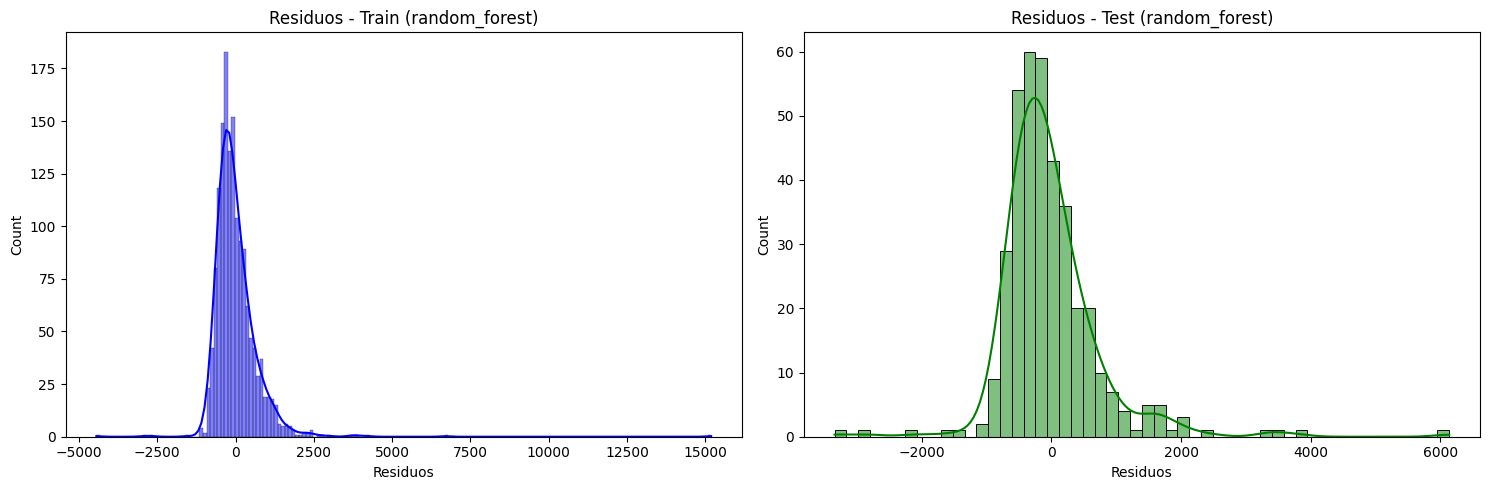

In [8]:
analisis_random_forest.plot_residuos("random_forest")

In [9]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.67,0.55
MAE,455.22,500.19
MSE,"558,129.45","595,940.80"
RMSE,747.08,771.97


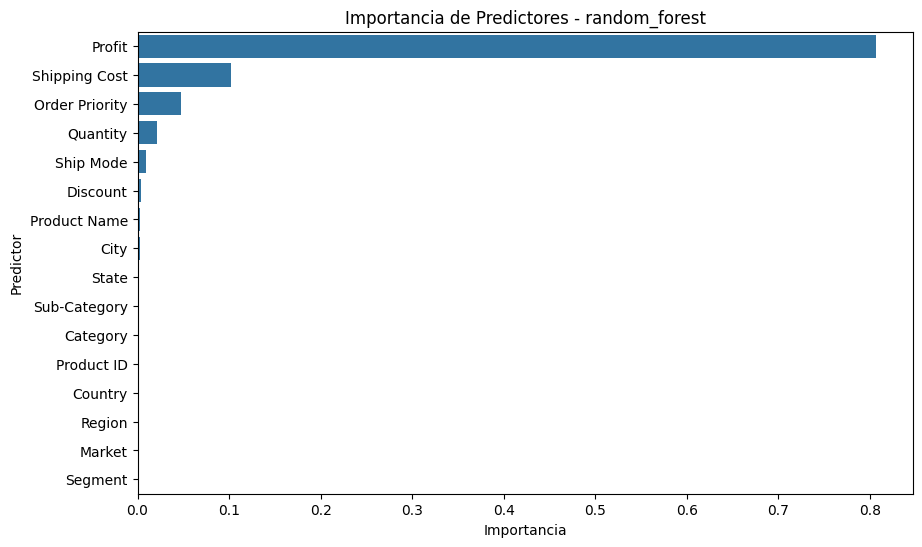

,Predictor,Importancia
13,Profit,0.81
14,Shipping Cost,0.10
15,Order Priority,0.05
11,Quantity,0.02
0,Ship Mode,0.01
12,Discount,0.00
10,Product Name,0.00
2,City,0.00
3,State,0.00
9,Sub-Category,0.00


In [10]:
analisis_random_forest.importancia_predictores("random_forest")

In [11]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_gb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2013,"2,591.56","1,857.02",Train,gradient_boosting,734.54
1736,"2,679.12","2,494.34",Train,gradient_boosting,184.78
1006,"1,838.52","1,589.99",Train,gradient_boosting,248.53


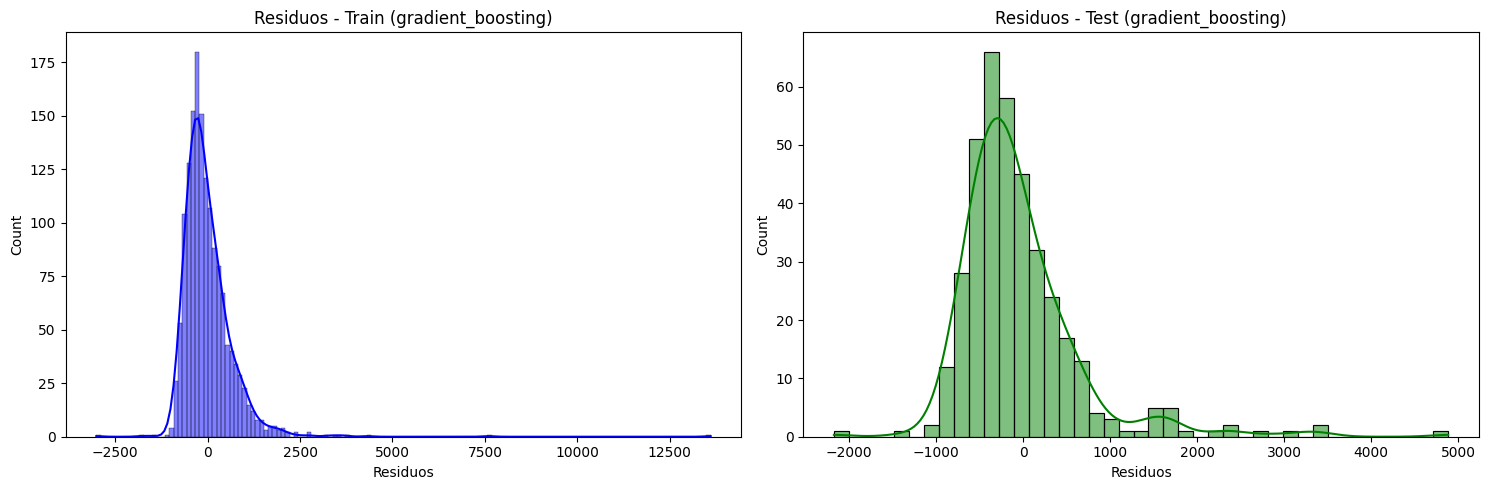

In [12]:
analisis_gradient_boosting.plot_residuos("gradient_boosting")

In [13]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.69,0.63
MAE,455.20,478.11
MSE,"517,320.27","499,967.94"
RMSE,719.25,707.08


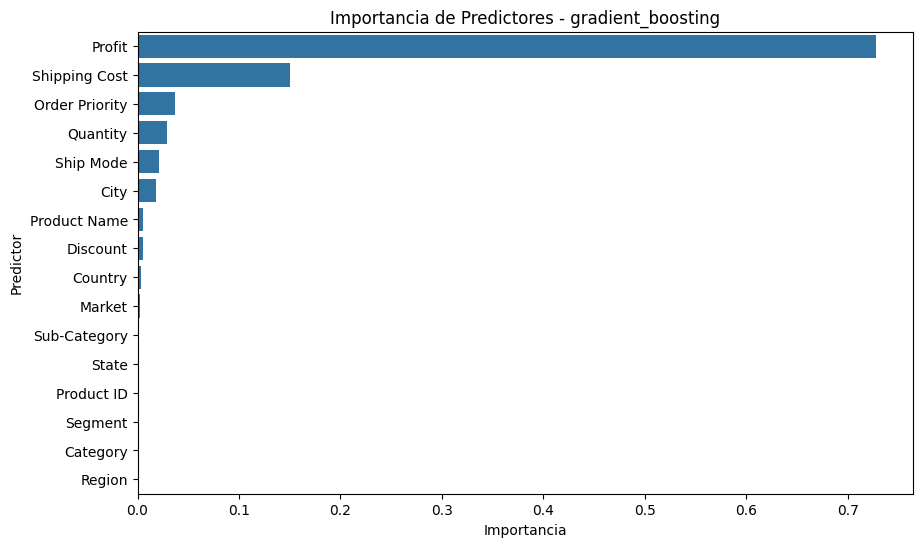

,Predictor,Importancia
13,Profit,0.73
14,Shipping Cost,0.15
15,Order Priority,0.04
11,Quantity,0.03
0,Ship Mode,0.02
2,City,0.02
10,Product Name,0.01
12,Discount,0.01
4,Country,0.00
5,Market,0.00


In [14]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [15]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_xgb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}


# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2013,"2,591.56","1,891.48",Train,xgboost,700.08
1736,"2,679.12","2,489.73",Train,xgboost,189.39
1006,"1,838.52","1,695.42",Train,xgboost,143.10


In [16]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.57,0.55
MAE,540.20,540.12
MSE,"721,800.20","601,657.22"
RMSE,849.59,775.67


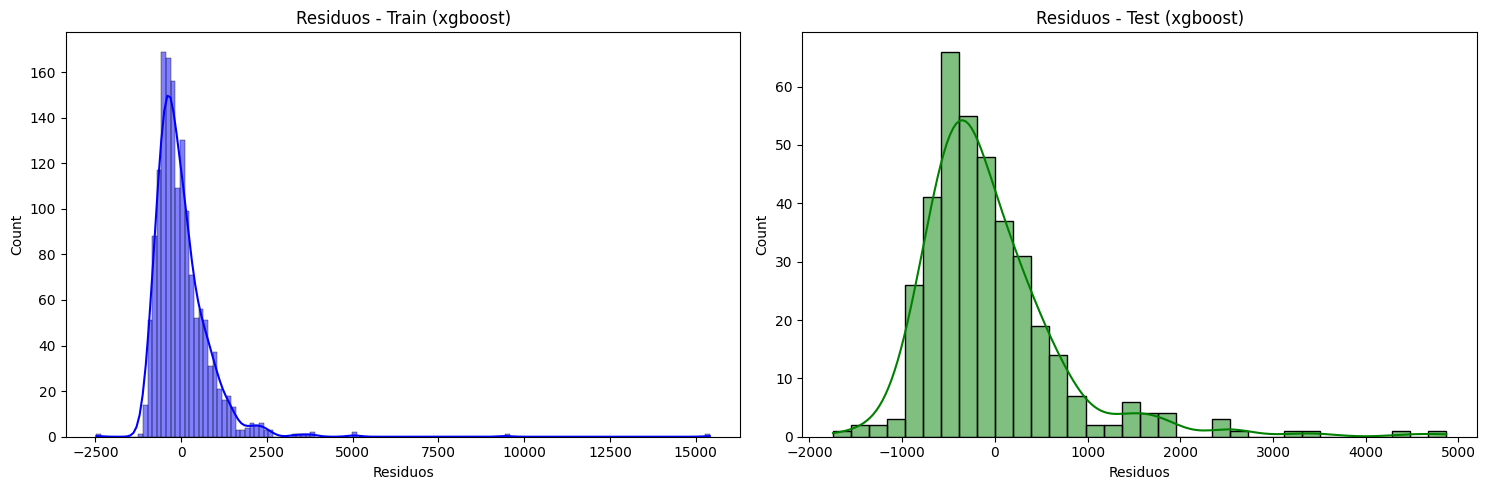

In [17]:
analisis_xgboost.plot_residuos("xgboost")

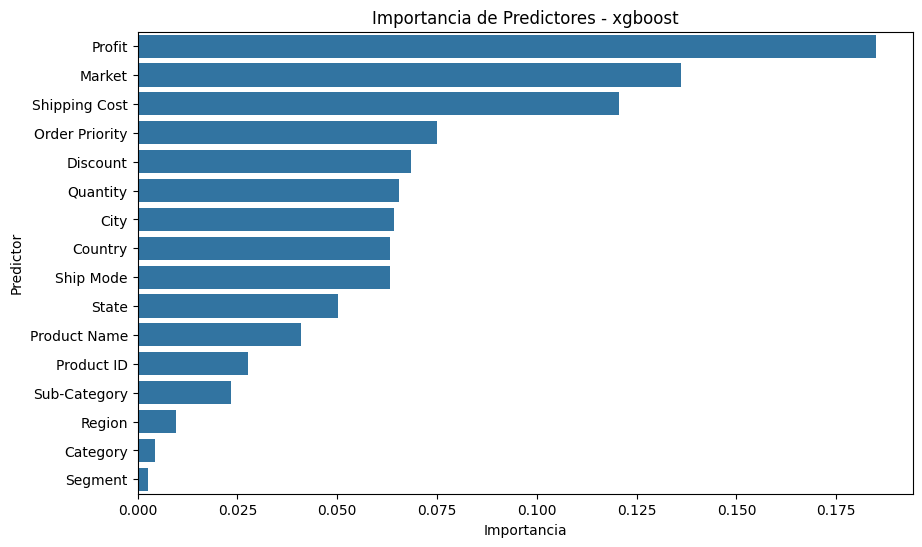

,Predictor,Importancia
13,Profit,0.18
5,Market,0.14
14,Shipping Cost,0.12
15,Order Priority,0.08
12,Discount,0.07
11,Quantity,0.07
2,City,0.06
4,Country,0.06
0,Ship Mode,0.06
3,State,0.05


In [18]:
analisis_xgboost.importancia_predictores("xgboost")

In [19]:
analisis.calcular_metricas("tree")

,train,test
R2,0.62,0.62
MAE,434.21,458.92
MSE,"639,152.34","512,689.48"
RMSE,799.47,716.02


In [20]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.57,0.55
MAE,540.20,540.12
MSE,"721,800.20","601,657.22"
RMSE,849.59,775.67


In [21]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.69,0.63
MAE,455.20,478.11
MSE,"517,320.27","499,967.94"
RMSE,719.25,707.08


In [22]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.67,0.55
MAE,455.22,500.19
MSE,"558,129.45","595,940.80"
RMSE,747.08,771.97


In [23]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2013,"2,591.56","1,822.54",Train,random_forest,769.02
1736,"2,679.12","2,699.60",Train,random_forest,-20.48
1006,"1,838.52","1,451.27",Train,random_forest,387.25
